In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'

feature_name_df = pd.read_csv(url, sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name = feature_name_df.iloc[:, 1].values.tolist()

In [3]:
X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'

X_train = pd.read_csv(X_train_url, sep='\s+', header=None)
X_test = pd.read_csv(X_test_url, sep='\s+', header=None)

In [4]:
X_train.columns = feature_name
X_test.columns = feature_name

In [5]:
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv(y_train_url, sep='\s+', header=None, names=['action'])
y_test = pd.read_csv(y_test_url, sep='\s+', header=None, names=['action'])

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [7]:
from sklearn.decomposition import PCA 

def get_pca_data(ss_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

In [8]:
%%time

HAR_pca, pca = get_pca_data(X_train, n_components=2)
HAR_pca.shape

CPU times: total: 203 ms
Wall time: 193 ms


(7352, 2)

In [9]:
pca.mean_.shape, pca.components_.shape

((561,), (2, 561))

In [10]:
cols = ['pca_'+str(n) for n in range(pca.components_.shape[0])]
cols

['pca_0', 'pca_1']

In [11]:
def get_pd_from_pca(pca_data, col_num):
    cols = ['pca_'+str(n) for n in range(col_num)]

    return pd.DataFrame(pca_data, columns=cols)

In [12]:
%%time

HAR_pca, pca = get_pca_data(X_train, n_components=2)
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train
HAR_pd_pca.head()

CPU times: total: 406 ms
Wall time: 173 ms


,pca_0,pca_1,action
0,-5.520280,-0.290278,5
1,-5.535350,-0.082530,5
2,-5.474988,0.287387,5
3,-5.677232,0.897031,5
4,-5.748749,1.162952,5


c:\Users\tmdck\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


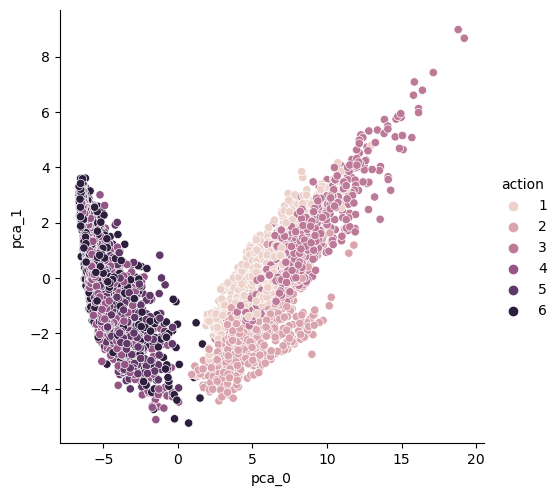

In [13]:
import seaborn as sns

sns.pairplot(HAR_pd_pca, hue='action', height=5, x_vars=['pca_0'], y_vars=['pca_1']);

In [14]:
import numpy as np

def print_variance_ratio(pca):
    print('variace_ratio :', pca.explained_variance_ratio_)
    print('sum of variance_ratio :', np.sum(pca.explained_variance_ratio_))

In [15]:
print_variance_ratio(pca)

variace_ratio : [0.6255444  0.04913023]
sum of variance_ratio : 0.674674627048794


In [16]:
HAR_pca, pca = get_pca_data(X_train, n_components=3)
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train
HAR_pd_pca.head()

,pca_0,pca_1,pca_2,action
0,-5.520280,-0.290278,-1.529929,5
1,-5.535350,-0.082530,-1.924804,5
2,-5.474988,0.287387,-2.144642,5
3,-5.677232,0.897031,-2.018220,5
4,-5.748749,1.162952,-2.139533,5


In [17]:
print_variance_ratio(pca)

variace_ratio : [0.6255444  0.04913023 0.04121467]
sum of variance_ratio : 0.7158893015785913


In [18]:
HAR_pca, pca = get_pca_data(X_train, n_components=10)
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train
HAR_pd_pca.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,action
0,-5.520280,-0.290278,-1.529929,1.333239,1.425092,-0.194722,0.577437,0.691515,-1.223259,-0.363718,5
1,-5.535350,-0.082530,-1.924804,0.671271,0.671258,0.735243,-0.616912,-0.771799,-0.615485,-0.895525,5
2,-5.474988,0.287387,-2.144642,0.531805,0.207823,-0.037627,0.057632,0.093796,-0.063108,-0.216851,5
3,-5.677232,0.897031,-2.018220,0.157128,0.759083,1.079452,-0.267820,-0.731306,0.281825,0.466880,5
4,-5.748749,1.162952,-2.139533,0.207827,0.473091,0.462953,-0.152193,-0.107345,0.290257,0.539743,5


In [19]:
print_variance_ratio(pca)

variace_ratio : [0.6255444  0.04913023 0.04121467 0.01874956 0.0169486  0.01272069
 0.01176685 0.01068973 0.00969377 0.00858017]
sum of variance_ratio : 0.8050386689055274


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [21]:
%%time

params = {
    'max_depth': [6, 8, 10],
    'n_estimators': [50, 100, 200],
    'min_samples_leaf': [8, 12],
    'min_samples_split': [8, 12]
}

rf_clf = RandomForestClassifier(random_state=17, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(HAR_pca, y_train.values.reshape(-1,))

CPU times: total: 5.55 s
Wall time: 40.1 s


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [22]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)
cv_result_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [23]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']
cv_result_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
28,1,0.838547,100,10
25,1,0.838547,100,10
29,3,0.837867,200,10
26,3,0.837867,200,10
35,5,0.837459,200,10


In [24]:
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [25]:
grid_cv.best_score_

0.8385473340587595

In [26]:
from sklearn.metrics import accuracy_score

rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(HAR_pca, y_train.values.reshape(-1, ))

pred1 = rf_clf_best.predict(pca.transform(X_test))

accuracy_score(y_test, pred1)

0.8557855446216491

In [27]:
%%time

from xgboost import XGBClassifier

evals = [(pca.transform(X_test), y_test-1)]

xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb.fit(HAR_pca, (y_train-1).values.reshape(-1,), early_stopping_rounds=10, eval_set=evals)

[0]	validation_0-mlogloss:1.61500
[1]	validation_0-mlogloss:1.47653
[2]	validation_0-mlogloss:1.35904
[3]	validation_0-mlogloss:1.26377
[4]	validation_0-mlogloss:1.18108
[5]	validation_0-mlogloss:1.11039
[6]	validation_0-mlogloss:1.04646
[7]	validation_0-mlogloss:0.98949
[8]	validation_0-mlogloss:0.93972
[9]	validation_0-mlogloss:0.89263
[10]	validation_0-mlogloss:0.85210
[11]	validation_0-mlogloss:0.81591
[12]	validation_0-mlogloss:0.78354


c:\Users\tmdck\miniconda3\envs\ds_study\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-mlogloss:0.75314
[14]	validation_0-mlogloss:0.72537
[15]	validation_0-mlogloss:0.70073
[16]	validation_0-mlogloss:0.67924
[17]	validation_0-mlogloss:0.65912
[18]	validation_0-mlogloss:0.63978
[19]	validation_0-mlogloss:0.62217
[20]	validation_0-mlogloss:0.60599
[21]	validation_0-mlogloss:0.59078
[22]	validation_0-mlogloss:0.57715
[23]	validation_0-mlogloss:0.56338
[24]	validation_0-mlogloss:0.55105
[25]	validation_0-mlogloss:0.53912
[26]	validation_0-mlogloss:0.52843
[27]	validation_0-mlogloss:0.51935
[28]	validation_0-mlogloss:0.50941
[29]	validation_0-mlogloss:0.49994
[30]	validation_0-mlogloss:0.49224
[31]	validation_0-mlogloss:0.48454
[32]	validation_0-mlogloss:0.47730
[33]	validation_0-mlogloss:0.47117
[34]	validation_0-mlogloss:0.46539
[35]	validation_0-mlogloss:0.45928
[36]	validation_0-mlogloss:0.45327
[37]	validation_0-mlogloss:0.44817
[38]	validation_0-mlogloss:0.44313
[39]	validation_0-mlogloss:0.43818
[40]	validation_0-mlogloss:0.43405
[41]	validation_0-ml

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [28]:
accuracy_score(y_test-1, xgb.predict(pca.transform(X_test)))

0.8629114353579912